## Evaluating Environmental Impact of Exam Portfolio 

### Import Packages
Dependencies are described in the README.md file

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from scipy.stats import zscore
import seaborn.objects as so


### Load in Emissions Data 
The data is located in the ```out``` folder, and each of the .csv files ending with a run-id are loaded in to investigate the impact of the different tasks in each assignment. The individual .csv files are loaded into one dataframe, with columns containing the following information: 
- task_name: The manually specified name of the task
- project_name: The manually specified name of the assignment in which the task was performed
- duration: The time the task took to run, in seconds
- emisions: The approximate emisions from this task, in CO₂-equivalents, in kg. 
- emissions_rate: The emissions per second (kg/s)

As the data is extracted per task, a second dataframe will be created with the totals for each assignment. 

In [3]:
emissions = pd.DataFrame()
for file in sorted(glob.glob(os.path.join("../out/", "emissions_*"))):
    emissions = pd.concat([emissions, pd.read_csv(file, usecols=[0,2,4,5,6])])
emissions = emissions.sort_values(by= "project_name").reset_index(drop=True)
emissions

,task_name,project_name,duration,emissions,emissions_rate
0,Feature extraction,Assignment-1,187.111034,1.722601e-03,0.000009
1,Load spacy model,Assignment-1,1.346084,1.240391e-05,0.000009
2,Visualising features,Assignment-1,7.817864,7.197657e-05,0.000009
3,Load vectorised data (MLP),Assignment-2,0.013223,1.350464e-07,0.000009
4,Load vectorised data (LR),Assignment-2,0.010718,1.060970e-07,0.000009
5,Vectorize data,Assignment-2,11.030644,1.014808e-04,0.000009
6,Define vectorizer,Assignment-2,0.004021,3.588011e-08,0.000009
7,Load data,Assignment-2,0.377494,3.493013e-06,0.000009
8,Evaluate LR model,Assignment-2,0.047111,4.300415e-07,0.000009
9,Fit LR model,Assignment-2,0.066405,6.069169e-07,0.000009


In [4]:
emissions_total = emissions[["project_name", "duration", "emissions"]].groupby(["project_name"]).sum().reset_index()
(emissions_total["emissions"] / emissions_total["duration"])*100
emissions_total

,project_name,duration,emissions
0,Assignment-1,196.274982,0.001807
1,Assignment-2,2473.259483,0.022768
2,Assignment-3,13.349394,0.000123
3,Assignment-4,5208.031479,0.047947


In [15]:
emissions.loc[emissions["project_name"] == "Assignment-2"]

,task_name,project_name,duration,emissions,emissions_rate
3,Load vectorised data (MLP),Assignment-2,0.013223,1.350464e-07,0.000009
4,Load vectorised data (LR),Assignment-2,0.010718,1.060970e-07,0.000009
5,Vectorize data,Assignment-2,11.030644,1.014808e-04,0.000009
6,Define vectorizer,Assignment-2,0.004021,3.588011e-08,0.000009
7,Load data,Assignment-2,0.377494,3.493013e-06,0.000009
8,Evaluate LR model,Assignment-2,0.047111,4.300415e-07,0.000009
9,Fit LR model,Assignment-2,0.066405,6.069169e-07,0.000009
10,Load vectorised data (LR),Assignment-2,0.011984,1.202486e-07,0.000009
11,Fit LR model with GS,Assignment-2,158.351154,1.457815e-03,0.000009
12,Plot MLP training,Assignment-2,0.182935,1.679132e-06,0.000009


### Normalize Data
value minus minimum value divided by the minimum minus the maximum



In [73]:
emissions["emissions_rate_n"] = ((emissions["emissions_rate"] - emissions["emissions_rate"].min())/(emissions["emissions_rate"].max() - emissions["emissions_rate"].min())) 
emissions["emissions_rate_n"] = emissions["emissions_rate_n"]  - emissions["emissions_rate_n"].mean()

### Visualization of Emissions Data

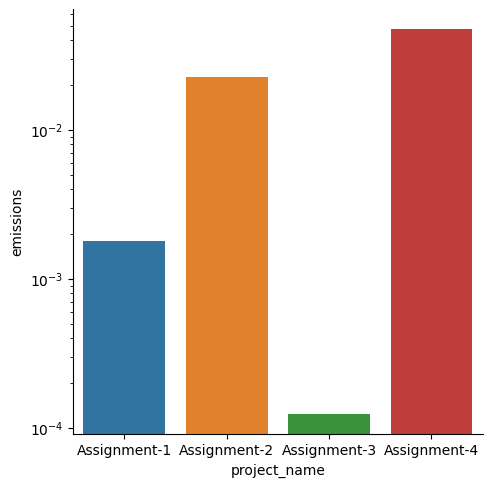

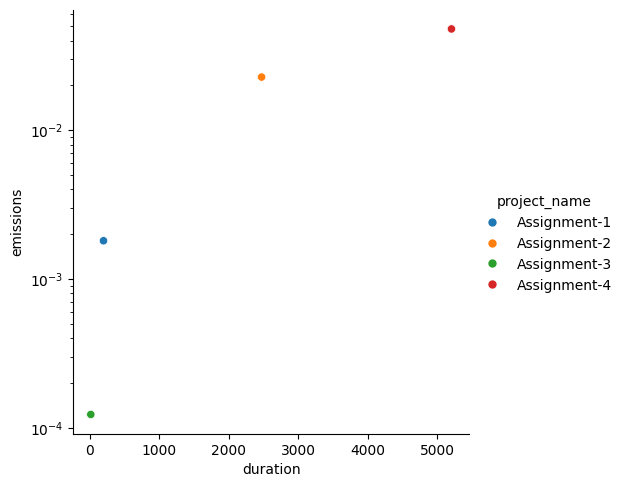

In [5]:
sns.catplot(data=emissions_total, 
            x="project_name", 
            y="emissions", 
            hue = "project_name", 
            kind="bar")
plt.yscale('log')

sns.relplot(data=emissions_total,
            x="duration", 
            y="emissions",
            hue="project_name")
plt.yscale('log')

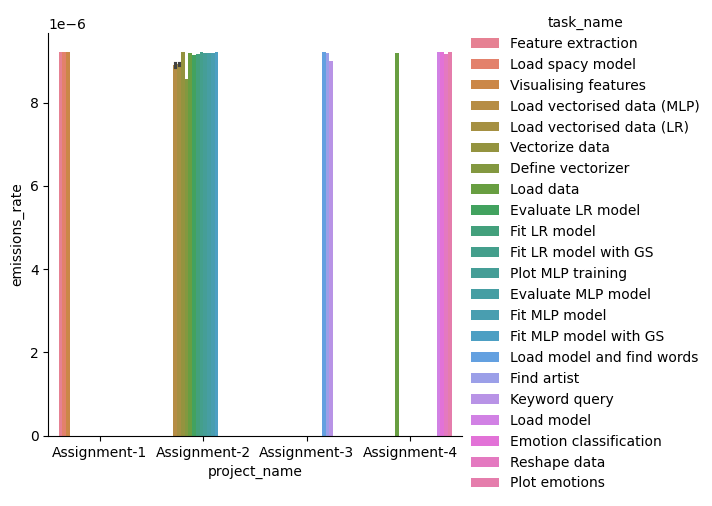

In [6]:
sns.catplot(data=emissions, 
            x="project_name", 
            y="emissions_rate", 
            hue = "task_name", 
            kind="bar")

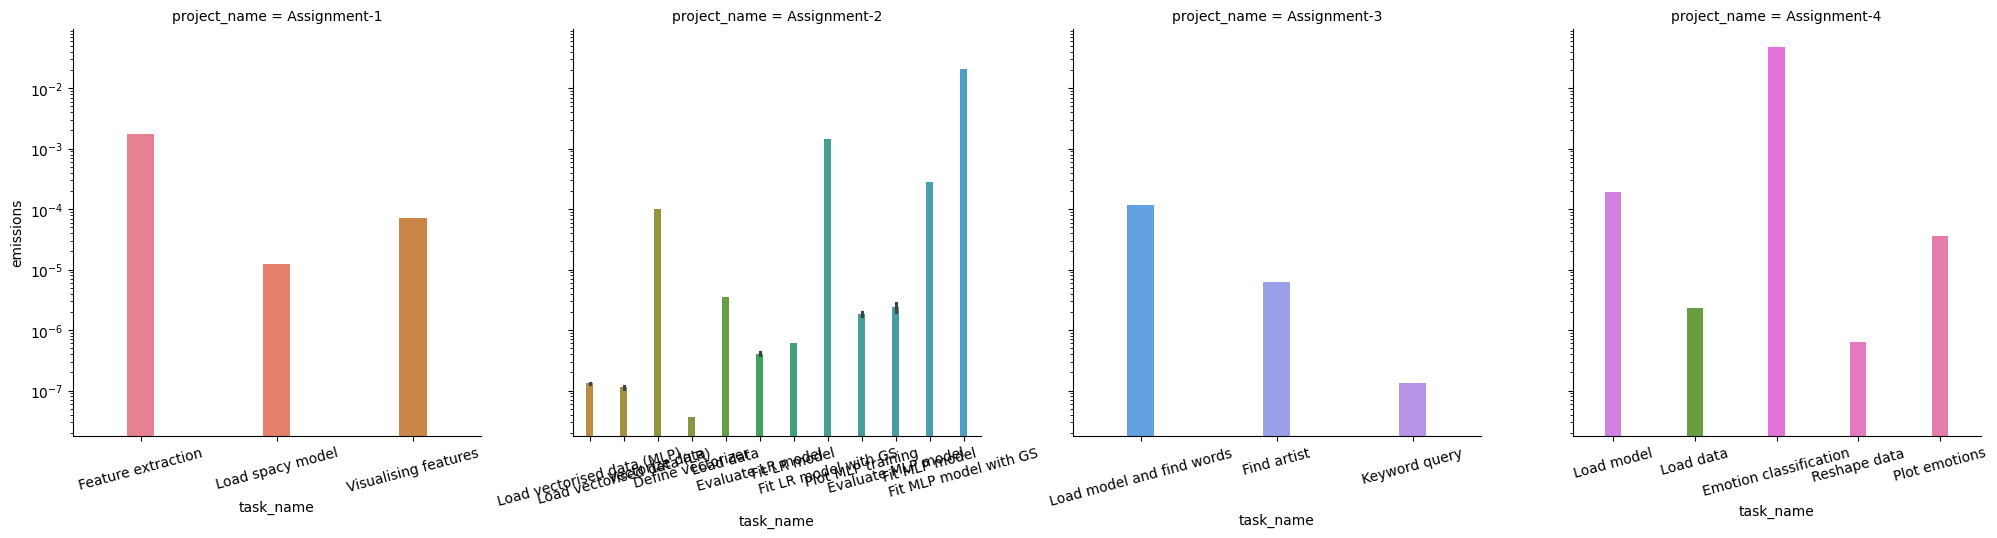

In [7]:
p = sns.catplot(data=emissions, 
            x="task_name", 
            y="emissions", 
            hue = "task_name", 
            kind="bar", 
            col = "project_name",
            width = .2,
            sharex = False)
p.set_xticklabels(rotation = 15)
plt.yscale('log')

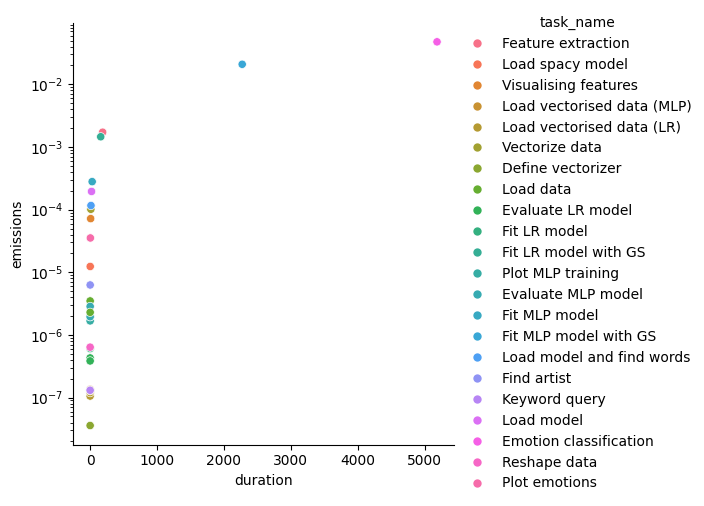

In [10]:
sns.relplot(
    data=emissions,
    x="duration", 
    y="emissions",
    hue="task_name")
plt.yscale('log')